# Rational
<center>Development for a fitting function (greedy+linear based on mvpolyfit and gmvpfit) that handles rational fucntions</center>

In [1]:
# Low-level import 
from numpy import *
from numpy.linalg import pinv,lstsq
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from numpy import *
import numpy as np
from positive import *

(positive)>> Applying custom matplotlib settings.


## Package Development (positive/learning.py)

### Setup test data

In [2]:
################################################################################
h = 3
Q = 25
x = h*linspace(-1,1,Q) 
y = h*linspace(-1,1,Q) 
X,Y = meshgrid(x,y)
# X += np.random.random( X.shape )-0.5
# Y += np.random.random( X.shape )-0.5

zfun = lambda xx,yy: 50 + (1.0 + (xx+0.5)*(yy+0.2)) / ( 0.9 + xx**2 + yy**2 )
numerator_symbols, denominator_symbols = ['01','0','1'], ['00','11'] 

# zfun = lambda xx,yy: 50 + (1.0 + 2*xx*yy - (xx+0.1)*(yy+0.2)) 
# numerator_symbols, denominator_symbols = ['01','0','1'], ['K'] 

np.random.seed(42)
ns = 0.05*(np.random.random( X.shape )-0.5)
Z = zfun(X,Y) + ns
domain,scalar_range = ndflatten( [X,Y], Z )
################################################################################

### Initiate class object for fitting

In [3]:
foo = mvrfit( domain, scalar_range, numerator_symbols, denominator_symbols, verbose=True )

### Plot using class method

/Users/book/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1168: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.any(self._markerfacecolor != fc):


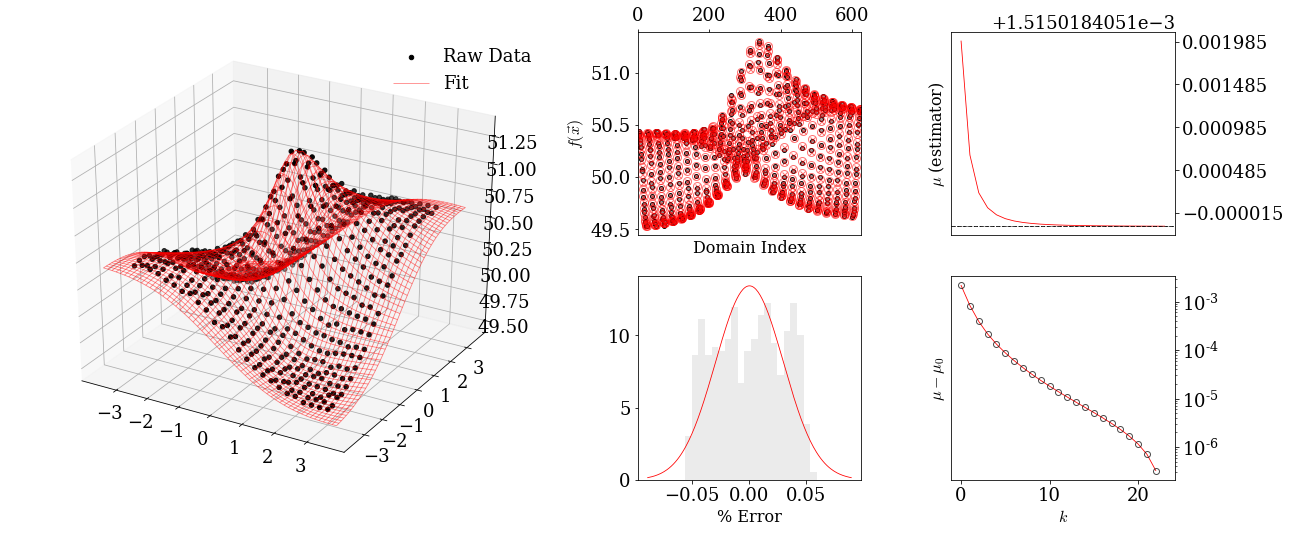

In [4]:
foo.plot()

### Generate python string for fit model

In [5]:
print foo.__str_python__(precision=8)

f = lambda x0,x1: 5.02368421e+01  +  4.07146347e-01 * (  5.35143002e-01*(x0) + -6.32569943e-01*(x0*x0) + 2.68530688e+00*(x0*x1) + 1.34721694e+00*(x1) + -6.45043364e-01*(x1*x1) + 2.39982650e+00 ) / ( 1.0 +  1.08705818e+00*(x0*x0) + 1.09028840e+00*(x1*x1) )


### Use greedy algorithm

In [6]:
star = gmvrfit( domain, scalar_range, verbose=True )

(gmvrfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is [('1', True)]
&& The current estimator value is 0.961302

(gmvrfit)>> Now working deg = 2
&& The estimator has changed by -0.924611
&& Degree tempering will continue.
&& The current boundary is [('01', True), ('11', True), ('1', True), ('00', False), ('11', False), ('00', True), ('0', True)]
&& The current estimator value is 0.036691

(gmvrfit)>> Now working deg = 3
&& The estimator has changed by 0.000000
&& Degree tempering will continue.
&& The current boundary is [('01', True), ('11', True), ('1', True), ('00', False), ('11', False), ('00', True), ('0', True)]
&& The current estimator value is 0.036691

(gmvrfit)>> Now working deg = 4
&& The estimator has changed by 0.000000
&& Degree tempering has completed becuase the estimator hasnt changes since the last degree value. The results of the last iteration will be kept.
&& The Final boundary is [('01', T

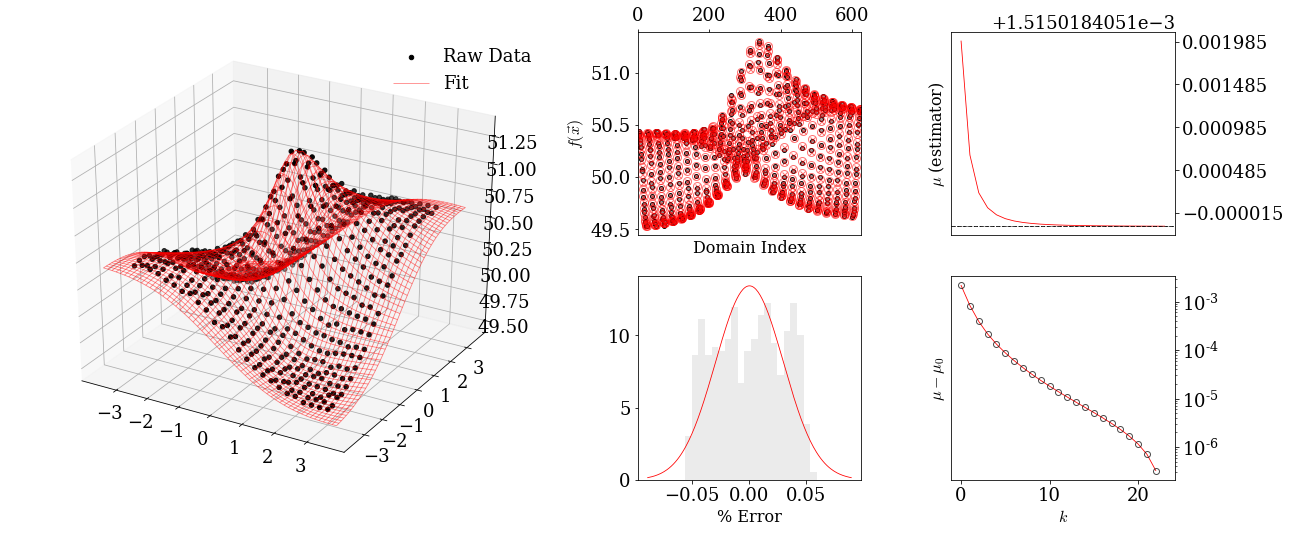

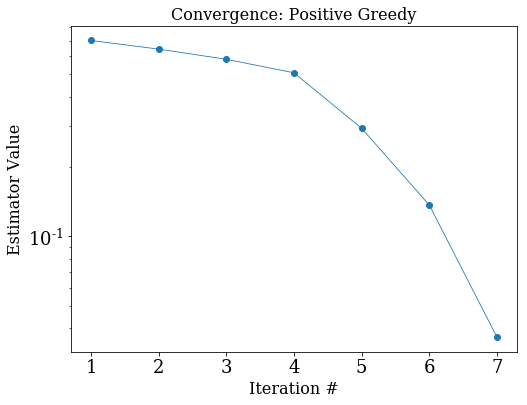

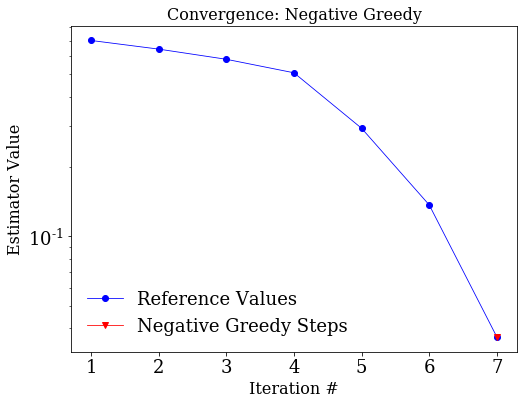

In [7]:
star.plot()
star.bin['pgreedy_result'].plot()
star.bin['ngreedy_result'].plot()